# Análise e Modelagem Linear de Dados de Sangue

Este notebook demonstra como criar um modelo linear simples para prever valores de hemoglobina a partir de dados espectrais.# Exploração inicial dos dados

In [1]:
# Instalação das bibliotecas necessárias
%pip install gdown -q

Note: you may need to restart the kernel to use updated packages.


## 1. Download dos Dados

Baixamos os dados do Google Drive para uso local.

In [2]:
import gdown

url = "https://drive.google.com/drive/folders/1fj_Rd3Pu_kVkRppchOl0G0AH1z_0IDvr?usp=sharing"
gdown.download_folder(url, quiet=True, use_cookies=False)

['/Users/orlow/dev/heuristics/trabalho_final/dados_sangue/IDRCShootOut2010Completo.mat',
 '/Users/orlow/dev/heuristics/trabalho_final/dados_sangue/TestSetReferenceValues.xlsx']

## 2. Carregamento e Exploração dos Dados

Carregamos os dados de espectros e valores de referência.

In [3]:
from scipy.io import loadmat
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = loadmat("dados_sangue/IDRCShootOut2010Completo.mat")

In [4]:
print("Chaves disponíveis no arquivo de dados:")
data.keys()

Chaves disponíveis no arquivo de dados:


dict_keys(['__header__', '__version__', '__globals__', 'WLaxis', 'XcalReflect', 'XcalTrans', 'XstdReflect', 'XstdTrans', 'XtestReflect', 'XtestTrans', 'XvalReflect', 'XvalTrans', 'YcalReflect', 'YcalTrans', 'YstdReflect', 'YstdTrans', 'YtestReflect', 'YtestTrans', 'YvalReflect', 'YvalTrans', 'labels'])

In [5]:
Xcaltrans = data['XcalTrans']
Ycaltrans = data['YcalTrans']
print("Estrutura de XcalTrans:", Xcaltrans.shape)
print("Estrutura de YcalTrans:", Ycaltrans.shape)   


Estrutura de XcalTrans: (143, 700)
Estrutura de YcalTrans: (143, 3)


## 3. Preparação dos Dados para Modelagem

Selecionamos os dados de espectros de reflectância e os valores alvo (hemoglobina).

Formato dos dados de treinamento (X): (143, 700)
Formato dos dados de teste (X): (138, 700)
Quantidade de amostras de treinamento: 143
Quantidade de amostras de teste: 138


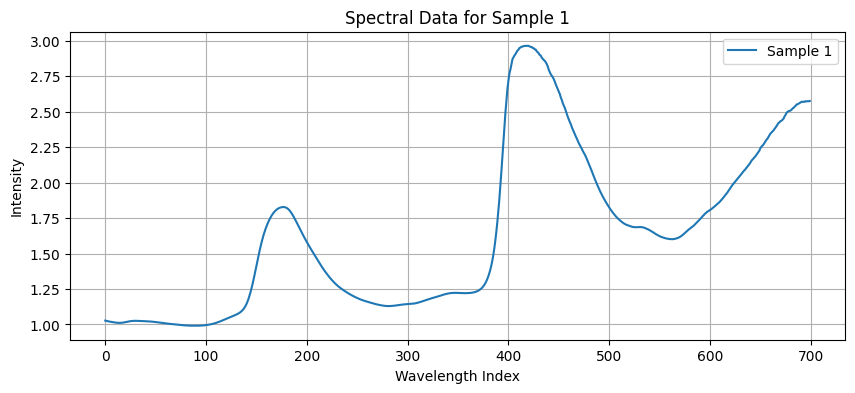

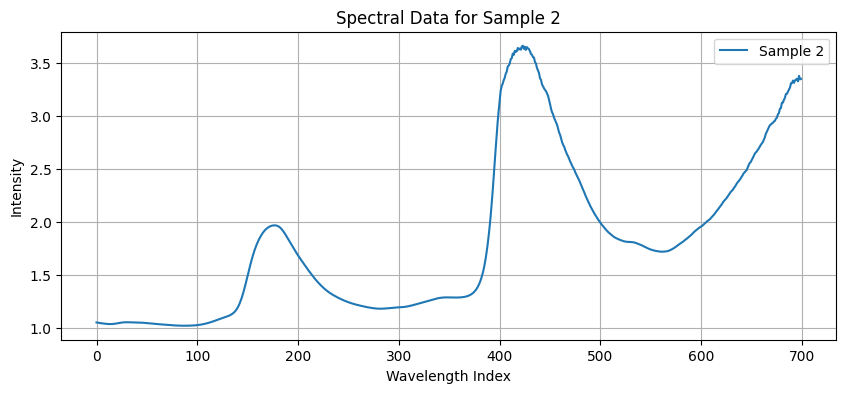

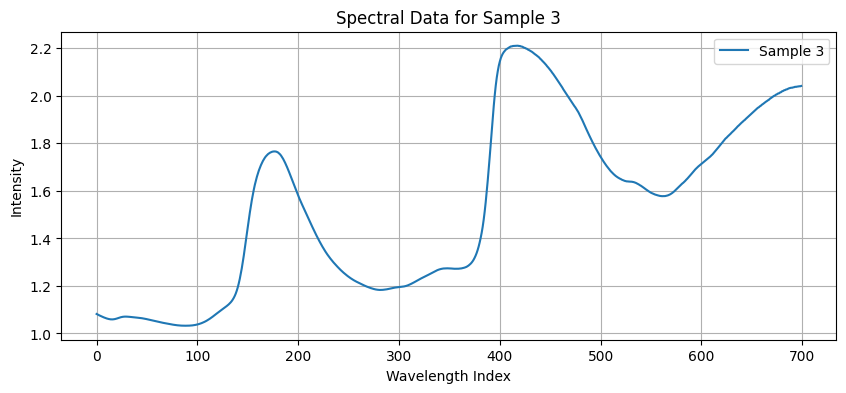

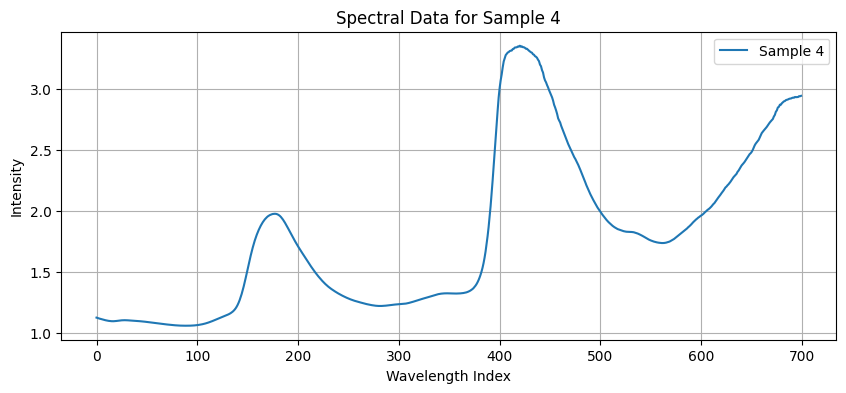

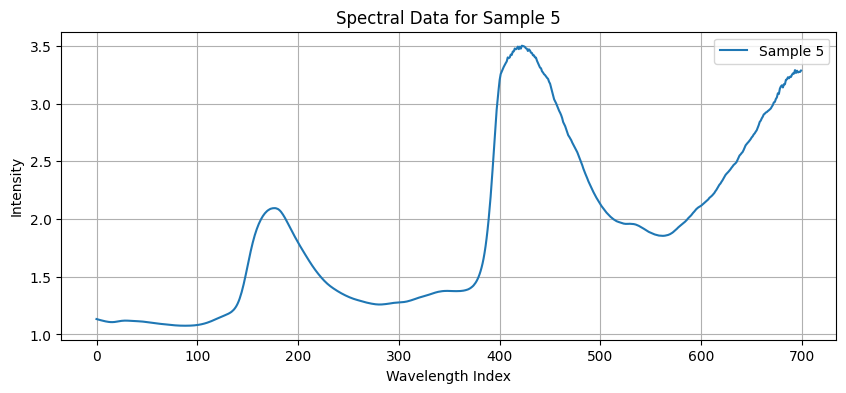

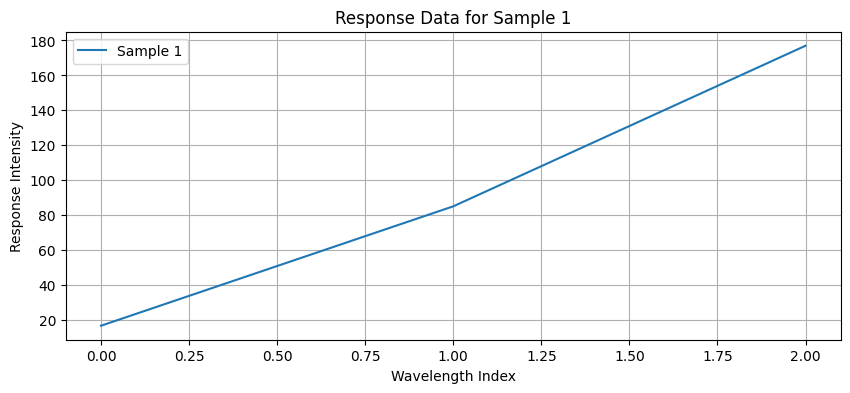

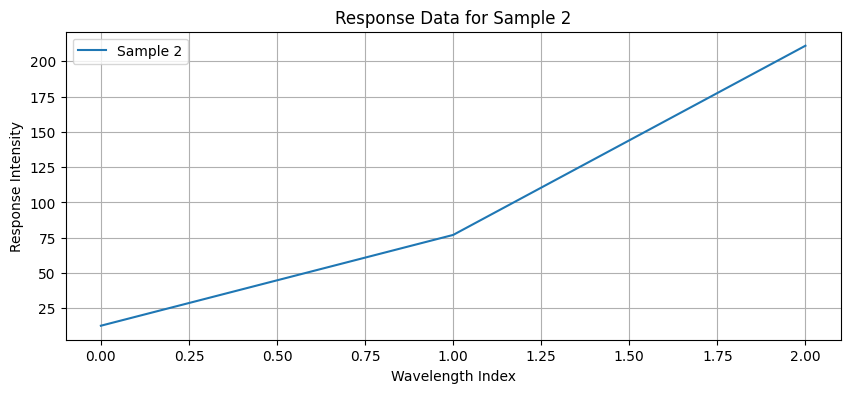

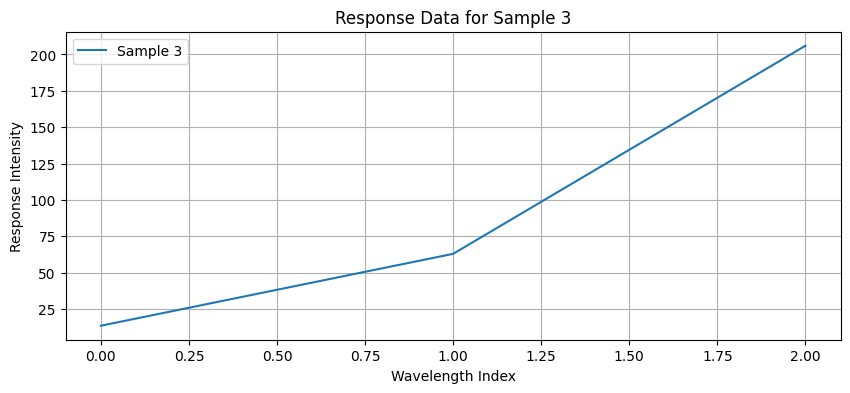

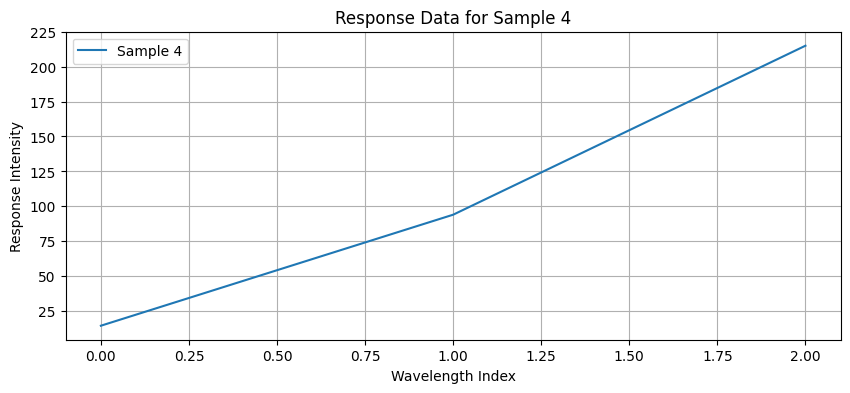

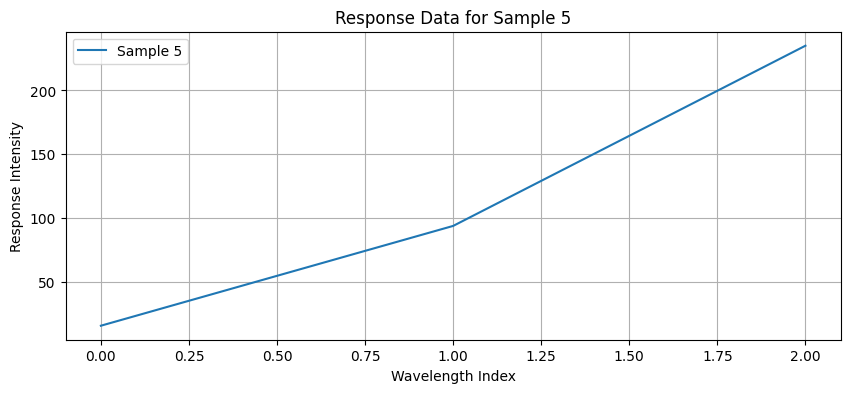

In [6]:


X_train = data["XcalTrans"]  # Espectros de calibração em reflectância
Y_train = data["YcalTrans"]  # Valores de referência

# Escolhemos apenas a Hemoglobina (primeira coluna dos valores de referência)
y_train = Y_train[:, 0]

# Dados para teste do modelo
X_test = data["XtestTrans"]
Y_test = data["YtestTrans"]
y_test = Y_test[:, 0]

print(f"Formato dos dados de treinamento (X): {X_train.shape}")
print(f"Formato dos dados de teste (X): {X_test.shape}")
print(f"Quantidade de amostras de treinamento: {len(y_train)}")
print(f"Quantidade de amostras de teste: {len(y_test)}")

# show me graphs of the first 5 samples
for i in range(5):
    plt.figure(figsize=(10, 4))
    plt.plot(Xcaltrans[i, :], label='Sample {}'.format(i + 1))
    plt.title('Spectral Data for Sample {}'.format(i + 1))
    plt.xlabel('Wavelength Index')
    plt.ylabel('Intensity')
    plt.legend()
    plt.grid()
    plt.show()

for i in range(5):
    plt.figure(figsize=(10, 4))
    plt.plot(Ycaltrans[i, :], label='Sample {}'.format(i + 1))
    plt.title('Response Data for Sample {}'.format(i + 1))
    plt.xlabel('Wavelength Index')
    plt.ylabel('Response Intensity')
    plt.legend()
    plt.grid()
    plt.show()
    


Iteration 1/50 | Best rmse: 1.126099 | Features: 343/700
Iteration 10/50 | Best rmse: 0.856197 | Features: 351/700
Iteration 20/50 | Best rmse: 0.801766 | Features: 325/700
Iteration 30/50 | Best rmse: 0.801766 | Features: 325/700
Iteration 40/50 | Best rmse: 0.801766 | Features: 325/700
Iteration 50/50 | Best rmse: 0.801766 | Features: 325/700

Selected 325 features out of 700
Selected wavelength indices: [  2   8  10  11  12  13  17  19  22  23  26  30  32  33  34  37  38  39
  41  44  45  46  48  53  54  64  65  66  67  68  69  70  72  75  76  77
  79  81  82  83  86  87  89  90  91  95  98 100 103 106 108 109 110 111
 113 115 116 118 119 120 121 122 123 124 125 129 133 134 135 138 139 140
 141 142 143 144 145 146 148 150 151 153 161 167 169 170 173 174 177 178
 181 186 187 193 195 197 199 201 203 204 205 206 207 208 210 214 218 219
 221 223 225 227 231 235 241 243 244 246 250 252 254 255 256 259 262 263
 264 269 273 275 277 278 280 282 284 287 288 290 291 292 295 296 298 301
 302 3

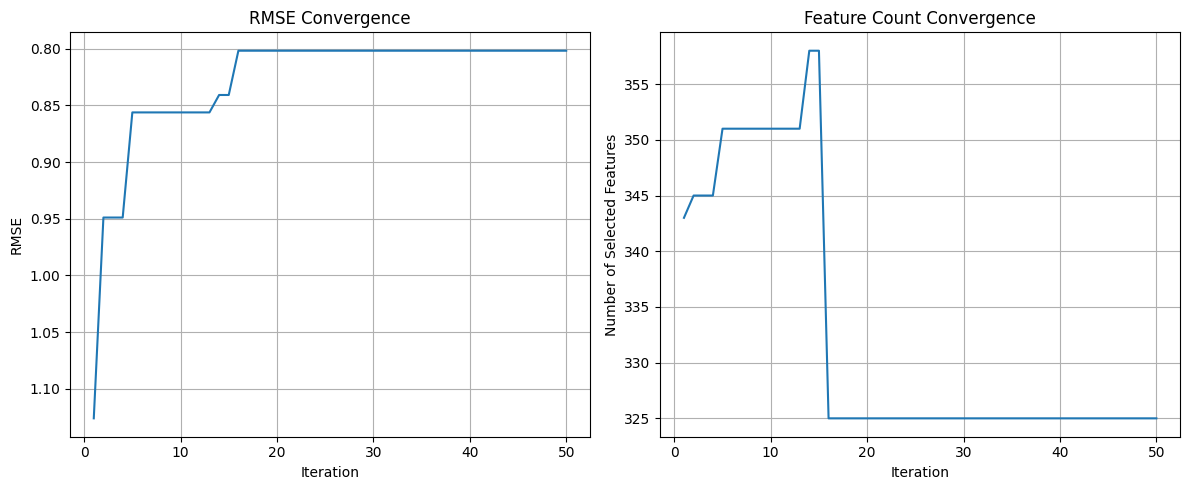


Test Set Performance with Selected Features:
R² = 0.4608
RMSE = 2.1108

Comparison with Full Model:
Full Model - R²: 0.3975, RMSE: 2.2311
Selected Features - R²: 0.4608, RMSE: 2.1108


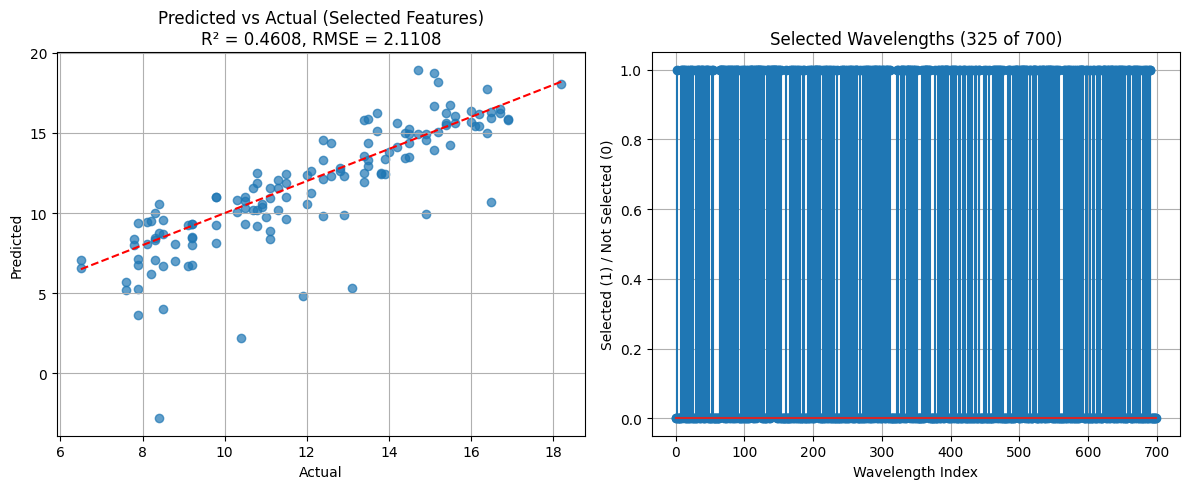


## Using Selected Features with Reflectance Data ##
XcalReflect shape: (173, 700)
XtestReflect shape: (194, 700)
YcalTrans shape: (143, 3)
YtestTrans shape: (138, 1)
Number of training samples: X=173, y=143
Number of test samples: X=194, y=138
Adjusted X_train_reflect to 143 samples
Adjusted X_test_reflect to 138 samples

MLR Performance with Selected Features on Reflectance Data:
R² = -2.7581
RMSE = 5.5723
MAE = 4.5617
Bias = 0.7982


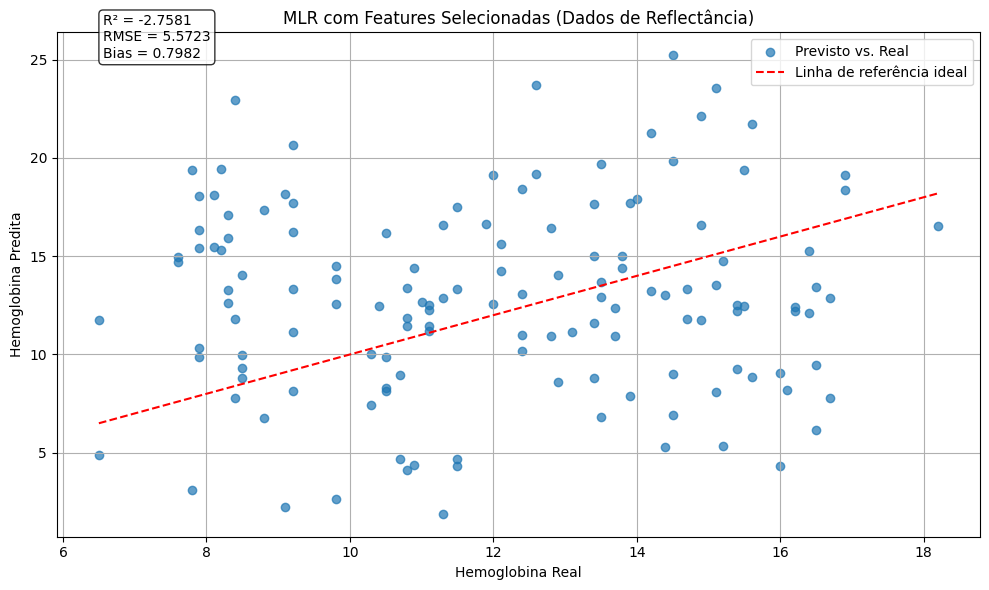


Model Comparison:
Transmittance Model - R²: 0.4608, RMSE: 2.1108
Reflectance Model - R²: -2.7581, RMSE: 5.5723


In [9]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt

class FeatureSelectionPSO:
    def __init__(self, X, y, estimator=LinearRegression(), 
                 swarm_size=30, max_iter=100, c1=2.0, c2=2.0, 
                 w_start=0.9, w_end=0.4, k_fold=5, metric='rmse'):
        """
        PSO for feature selection in spectral data
        
        Parameters:
        -----------
        X : array-like, shape (n_samples, n_features)
            The training input samples (spectral data)
        y : array-like, shape (n_samples,)
            The target values (hemoglobin values)
        estimator : object, default=LinearRegression()
            A regression model with fit and predict methods
        swarm_size : int, default=30
            Number of particles in the swarm
        max_iter : int, default=100
            Maximum number of iterations
        c1 : float, default=2.0
            Cognitive coefficient (personal best)
        c2 : float, default=2.0
            Social coefficient (global best)
        w_start : float, default=0.9
            Initial inertia weight
        w_end : float, default=0.4
            Final inertia weight
        k_fold : int, default=5
            Number of folds for cross-validation
        metric : str, default='rmse'
            Fitness metric: 'rmse' or 'r2'
        """
        self.X = X
        self.y = y
        self.n_samples, self.n_features = X.shape
        self.estimator = estimator
        self.swarm_size = swarm_size
        self.max_iter = max_iter
        self.c1 = c1
        self.c2 = c2
        self.w_start = w_start
        self.w_end = w_end
        self.k_fold = k_fold
        self.metric = metric
        
        # Initialize solution trackers
        self.best_position = None
        self.best_fitness = float('inf') if metric == 'rmse' else -float('inf')
        self.fitness_history = []
        self.n_selected_features_history = []
    
    def _initialize_swarm(self):
        """Initialize particles and velocities"""
        # Binary particle positions (0/1 for each feature)
        self.particles = np.random.rand(self.swarm_size, self.n_features) > 0.5
        # Continuous velocities
        self.velocities = np.random.randn(self.swarm_size, self.n_features) * 0.1
        
        # Initialize personal best
        self.personal_best = self.particles.copy()
        self.personal_best_fitness = np.array([self._evaluate_particle(p) for p in self.particles])
        
        # Initialize global best
        best_idx = np.argmin(self.personal_best_fitness) if self.metric == 'rmse' else np.argmax(self.personal_best_fitness)
        self.global_best = self.personal_best[best_idx].copy()
        self.global_best_fitness = self.personal_best_fitness[best_idx]
    
    def _sigmoid(self, x):
        """Sigmoid function to map velocities to probabilities"""
        return 1 / (1 + np.exp(-x))
    
    def _evaluate_particle(self, particle):
        """
        Evaluate a particle (feature subset) using cross-validation
        
        Parameters:
        -----------
        particle : array-like, shape (n_features,)
            Binary vector indicating selected features
            
        Returns:
        --------
        float : fitness value (RMSE or R2)
        """
        # If no features selected, return worst fitness
        if not np.any(particle):
            return float('inf') if self.metric == 'rmse' else -float('inf')
        
        # Extract selected features
        X_selected = self.X[:, particle]
        
        # K-fold cross-validation
        kf = KFold(n_splits=self.k_fold, shuffle=True, random_state=42)
        cv_scores = []
        
        for train_idx, test_idx in kf.split(X_selected):
            X_train, X_test = X_selected[train_idx], X_selected[test_idx]
            y_train, y_test = self.y[train_idx], self.y[test_idx]
            
            # Train model
            model = self.estimator
            model.fit(X_train, y_train)
            
            # Predict and evaluate
            y_pred = model.predict(X_test)
            
            if self.metric == 'rmse':
                score = np.sqrt(mean_squared_error(y_test, y_pred))
            else:  # r2
                score = r2_score(y_test, y_pred)
            
            cv_scores.append(score)
        
        # Return mean score
        return np.mean(cv_scores)
    
    def optimize(self):
        """Run PSO optimization to find best feature subset"""
        # Initialize swarm
        self._initialize_swarm()
    
        # Track best solution
        if self.metric == 'rmse':
            is_better = lambda new, old: new < old
        else:  # r2
            is_better = lambda new, old: new > old
    
        # Main PSO loop
        for i in range(self.max_iter):
            # Update inertia weight (linear decrease)
            w = self.w_start - (self.w_start - self.w_end) * i / self.max_iter
        
            # For each particle
            for j in range(self.swarm_size):
                # Evaluate current position
                fitness = self._evaluate_particle(self.particles[j])
            
                # Update personal best
                if is_better(fitness, self.personal_best_fitness[j]):
                    self.personal_best[j] = self.particles[j].copy()
                    self.personal_best_fitness[j] = fitness
            
                # Update global best
                if is_better(fitness, self.global_best_fitness):
                    self.global_best = self.particles[j].copy()
                    self.global_best_fitness = fitness
        
            # Track progress
            self.fitness_history.append(self.global_best_fitness)
            self.n_selected_features_history.append(np.sum(self.global_best))
        
            # Update velocities and positions
            for j in range(self.swarm_size):
                # Update velocity - FIXED: convert boolean arrays to int before subtraction
                r1, r2 = np.random.rand(2)
                cognitive = self.c1 * r1 * (self.personal_best[j].astype(int) - self.particles[j].astype(int))
                social = self.c2 * r2 * (self.global_best.astype(int) - self.particles[j].astype(int))
                self.velocities[j] = w * self.velocities[j] + cognitive + social
            
                # Update position
                probabilities = self._sigmoid(self.velocities[j])
                self.particles[j] = np.random.rand(self.n_features) < probabilities
        
            # Print progress
            if (i+1) % 10 == 0 or i == 0:
                print(f"Iteration {i+1}/{self.max_iter} | "
                    f"Best {self.metric}: {self.global_best_fitness:.6f} | "
                    f"Features: {np.sum(self.global_best)}/{self.n_features}")
    
        # Store final best solution
        self.best_position = self.global_best
        self.best_fitness = self.global_best_fitness
    
        return self.best_position, self.best_fitness
    
    def get_selected_features(self):
        """Get indices of selected features"""
        if self.best_position is None:
            raise ValueError("Must run optimize() before getting selected features")
        return np.where(self.best_position)[0]
    
    def plot_convergence(self):
        """Plot convergence curve"""
        plt.figure(figsize=(12, 5))
        
        # Plot fitness history
        plt.subplot(1, 2, 1)
        plt.plot(range(1, len(self.fitness_history) + 1), self.fitness_history)
        plt.xlabel('Iteration')
        plt.ylabel(self.metric.upper())
        plt.title(f'{self.metric.upper()} Convergence')
        if self.metric == 'rmse':
            plt.gca().invert_yaxis()  # Lower RMSE is better
        plt.grid(True)
        
        # Plot number of selected features
        plt.subplot(1, 2, 2)
        plt.plot(range(1, len(self.n_selected_features_history) + 1), 
                 self.n_selected_features_history)
        plt.xlabel('Iteration')
        plt.ylabel('Number of Selected Features')
        plt.title('Feature Count Convergence')
        plt.grid(True)
        
        plt.tight_layout()
        plt.show()

# Usage example
def run_feature_selection():
    # Get your data
    X = data["XcalTrans"]  # Spectral data
    y = data["YcalTrans"][:, 0]  # Hemoglobin values (first column)
    
    # Initialize and run PSO
    pso = FeatureSelectionPSO(
        X=X, 
        y=y,
        swarm_size=30,
        max_iter=50,
        metric='rmse'  # or 'r2'
    )
    
    best_features, best_fitness = pso.optimize()
    
    # Get selected feature indices
    selected_indices = pso.get_selected_features()
    print(f"\nSelected {len(selected_indices)} features out of {X.shape[1]}")
    print(f"Selected wavelength indices: {selected_indices}")
    
    # Plot convergence
    pso.plot_convergence()
    
    # Train final model with selected features
    X_selected = X[:, best_features]
    X_test_selected = data["XtestTrans"][:, best_features]
    
    # Fit model with selected features
    model = LinearRegression()
    model.fit(X_selected, y)
    
    # Evaluate on test set
    y_test = data["YtestTrans"][:, 0]
    y_pred = model.predict(X_test_selected)
    
    # Calculate metrics
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    
    print("\nTest Set Performance with Selected Features:")
    print(f"R² = {r2:.4f}")
    print(f"RMSE = {rmse:.4f}")
    
    # Compare with full model
    model_full = LinearRegression()
    model_full.fit(X, y)
    y_pred_full = model_full.predict(data["XtestTrans"])
    
    r2_full = r2_score(y_test, y_pred_full)
    rmse_full = np.sqrt(mean_squared_error(y_test, y_pred_full))
    
    print("\nComparison with Full Model:")
    print(f"Full Model - R²: {r2_full:.4f}, RMSE: {rmse_full:.4f}")
    print(f"Selected Features - R²: {r2:.4f}, RMSE: {rmse:.4f}")
    
    # Visualize results
    plt.figure(figsize=(12, 5))
    
    # Plot predicted vs actual
    plt.subplot(1, 2, 1)
    plt.scatter(y_test, y_pred, alpha=0.7)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(f'Predicted vs Actual (Selected Features)\nR² = {r2:.4f}, RMSE = {rmse:.4f}')
    plt.grid(True)
    
    # Visualize selected wavelengths
    plt.subplot(1, 2, 2)
    wavelength_mask = np.zeros(X.shape[1])
    wavelength_mask[selected_indices] = 1
    plt.stem(range(X.shape[1]), wavelength_mask)
    plt.xlabel('Wavelength Index')
    plt.ylabel('Selected (1) / Not Selected (0)')
    plt.title(f'Selected Wavelengths ({len(selected_indices)} of {X.shape[1]})')
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()
    
    return selected_indices, model, r2, rmse

# Run the feature selection
selected_indices, best_model, r2, rmse = run_feature_selection()

# 7. Applying Selected Features with Reflectance Data
print("\n## Using Selected Features with Reflectance Data ##")

# Get the selected indices from the PSO feature selection
if 'selected_indices' not in locals():
    print("Running feature selection first...")
    selected_indices, _ = run_feature_selection()

# Check if we have the reflectance data
if "XcalReflect" in data and "XtestReflect" in data:
    # Print shapes to diagnose the issue
    print(f"XcalReflect shape: {data['XcalReflect'].shape}")
    print(f"XtestReflect shape: {data['XtestReflect'].shape}")
    print(f"YcalTrans shape: {data['YcalTrans'].shape}")
    print(f"YtestTrans shape: {data['YtestTrans'].shape}")
    
    # Extract reflectance data for training and testing
    X_train_reflect = data["XcalReflect"][:, selected_indices]
    X_test_reflect = data["XtestReflect"][:, selected_indices]
    
    # Target values remain the same (hemoglobin)
    y_train_reflect = data["YcalTrans"][:, 0]
    y_test_reflect = data["YtestTrans"][:, 0]
    
    # IMPORTANT: Check if the number of samples match
    print(f"Number of training samples: X={X_train_reflect.shape[0]}, y={len(y_train_reflect)}")
    print(f"Number of test samples: X={X_test_reflect.shape[0]}, y={len(y_test_reflect)}")
    
    # Fix the sample mismatch by using only the common samples
    # Option 1: If X has more samples than y, subset X to match y
    if X_train_reflect.shape[0] > len(y_train_reflect):
        X_train_reflect = X_train_reflect[:len(y_train_reflect), :]
        print(f"Adjusted X_train_reflect to {X_train_reflect.shape[0]} samples")
    
    # Option 2: If y has more samples than X, subset y to match X
    elif X_train_reflect.shape[0] < len(y_train_reflect):
        y_train_reflect = y_train_reflect[:X_train_reflect.shape[0]]
        print(f"Adjusted y_train_reflect to {len(y_train_reflect)} samples")
    
    # Do the same for test data
    if X_test_reflect.shape[0] > len(y_test_reflect):
        X_test_reflect = X_test_reflect[:len(y_test_reflect), :]
        print(f"Adjusted X_test_reflect to {X_test_reflect.shape[0]} samples")
    elif X_test_reflect.shape[0] < len(y_test_reflect):
        y_test_reflect = y_test_reflect[:X_test_reflect.shape[0]]
        print(f"Adjusted y_test_reflect to {len(y_test_reflect)} samples")
    
    # Now train a new MLR model on the selected features
    model_reflect = LinearRegression()
    model_reflect.fit(X_train_reflect, y_train_reflect)
    
    # Make predictions
    y_pred_reflect = model_reflect.predict(X_test_reflect)
    
    # Calculate performance metrics
    r2_reflect = r2_score(y_test_reflect, y_pred_reflect)
    mse_reflect = mean_squared_error(y_test_reflect, y_pred_reflect)
    rmse_reflect = np.sqrt(mse_reflect)
    mae_reflect = mean_absolute_error(y_test_reflect, y_pred_reflect)
    bias_reflect = np.mean(y_pred_reflect - y_test_reflect)
    
    print("\nMLR Performance with Selected Features on Reflectance Data:")
    print(f"R² = {r2_reflect:.4f}")
    print(f"RMSE = {rmse_reflect:.4f}")
    print(f"MAE = {mae_reflect:.4f}")
    print(f"Bias = {bias_reflect:.4f}")
    
    # Visualize results
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test_reflect, y_pred_reflect, alpha=0.7, label="Previsto vs. Real")
    plt.plot(
        [y_test_reflect.min(), y_test_reflect.max()], 
        [y_test_reflect.min(), y_test_reflect.max()], 
        "r--", 
        label="Linha de referência ideal"
    )
    plt.xlabel("Hemoglobina Real")
    plt.ylabel("Hemoglobina Predita")
    plt.title("MLR com Features Selecionadas (Dados de Reflectância)")
    plt.legend()
    plt.grid(True)
    
    plt.annotate(
        f"R² = {r2_reflect:.4f}\nRMSE = {rmse_reflect:.4f}\nBias = {bias_reflect:.4f}",
        xy=(0.05, 0.95), 
        xycoords='axes fraction',
        bbox=dict(boxstyle="round,pad=0.3", fc="white", alpha=0.8)
    )
    plt.tight_layout()
    plt.show()
    
    # Compare with the transmittance model
    print("\nModel Comparison:")
    print(f"Transmittance Model - R²: {r2:.4f}, RMSE: {rmse:.4f}")
    print(f"Reflectance Model - R²: {r2_reflect:.4f}, RMSE: {rmse_reflect:.4f}")

## 4. Criação do Modelo Linear

Implementamos um modelo de regressão linear simples para prever os valores de hemoglobina.

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

## 5. Avaliação do Modelo

Analisamos o desempenho do modelo usando diferentes métricas.

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

r2 = r2_score(y_test, y_pred)        # Coeficiente de determinação
mse = mean_squared_error(y_test, y_pred)  # Erro quadrático médio
rmse = np.sqrt(mse)                  # Raiz do erro quadrático médio
mae = mean_absolute_error(y_test, y_pred) # Erro absoluto médio
bias = np.mean(y_pred - y_test)      # Viés (bias)

print("Métricas de avaliação do modelo:")
print(f"R² = {r2:.4f}")
print(f"RMSE = {rmse:.4f}")
print(f"MAE = {mae:.4f}")
print(f"Bias = {bias:.4f}")

Métricas de avaliação do modelo:
R² = 0.3975
RMSE = 2.2311
MAE = 1.3218
Bias = -0.4467


## 6. Visualização dos Resultados

Visualizamos graficamente a comparação entre valores previstos e reais.

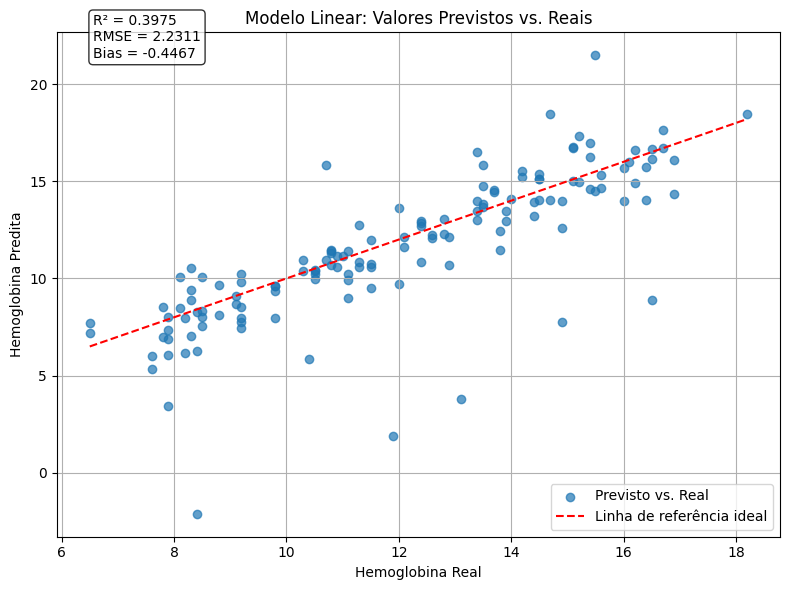

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, label="Previsto vs. Real")
plt.plot(
    [y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--", label="Linha de referência ideal"
)
plt.xlabel("Hemoglobina Real")
plt.ylabel("Hemoglobina Predita")
plt.title("Modelo Linear: Valores Previstos vs. Reais")
plt.legend()
plt.grid(True)

plt.annotate(f"R² = {r2:.4f}\nRMSE = {rmse:.4f}\nBias = {bias:.4f}",
             xy=(0.05, 0.95), xycoords='axes fraction',
             bbox=dict(boxstyle="round,pad=0.3", fc="white", alpha=0.8))
plt.tight_layout()
plt.show()